<a href="https://colab.research.google.com/github/PhamBaVuong/DataAnalysisDeepLearning/blob/main/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import files
uploaded = files.upload()

Saving titanic_disaster.csv to titanic_disaster (3).csv


In [45]:
import pandas as pd
import io

PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING

1. Viết hàm load_data() để tải dữ liệu lên ứng dụng.Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.

In [46]:
def load_data():
  datatitanic = pd.read_csv(io.StringIO(uploaded['titanic_disaster.csv'].decode('utf-8')))
  return datatitanic

In [47]:
datatitanic = load_data()

In [48]:
datatitanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked

In [49]:
datatitanic_isna = datatitanic[datatitanic.isna().any(axis = 1)]

In [50]:
datatitanic_isna.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


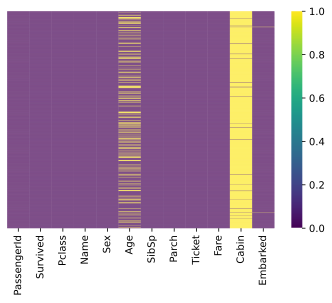

In [51]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(datatitanic_isna.isna(),
            yticklabels = False,
            cbar = True,
            cmap = 'viridis')

Cột Age thiếu dữ liệu nhiều
Cột Cabin thiếu dữ liệu hầu như gần hết
Cột Embarked chỉ thiếu dữ liệu ở 2 dòng

3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName

In [ ]:
datatitanic[['firstName', 'secondName']] = datatitanic['Name'].str.split(',', expand = True)
datatitanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr. James
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem)


In [52]:
datatitanic = datatitanic.drop('Name', axis = True)
datatitanic.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C


1. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male  M và female  F

In [53]:
datatitanic['Sex'].replace({'male': 'M', 'female': 'F'}, inplace = True)

In [54]:
datatitanic.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,M,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,M,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,M,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,F,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,F,14.0,1,0,237736,30.0708,NaN,C


Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau

a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.

b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map.

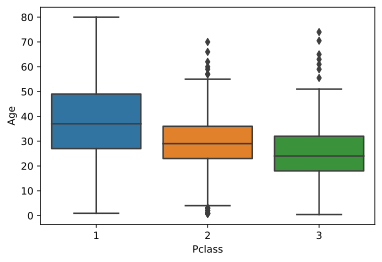

In [55]:
sns.boxplot(y = 'Age', x = 'Pclass', data = datatitanic)

In [85]:
pclass1 = datatitanic.loc[datatitanic['Pclass'] == 1]

In [86]:
pclass1['Age'].fillna(round(pclass1['Age'].mean()), inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [87]:
pclass1.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,M,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,F,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,M,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,M,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,M,40.0,0,0,PC 17601,27.7208,NaN,C
31,32,1,1,F,38.0,1,0,PC 17569,146.5208,B78,C
34,35,0,1,M,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,M,42.0,1,0,113789,52.0000,NaN,S


In [82]:
pclass2 = datatitanic.loc[datatitanic['Pclass'] == 2]

In [83]:
pclass2['Age'].fillna(round(pclass2['Age'].mean()), inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [84]:
pclass2.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,F,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,F,55.0,0,0,248706,16.0000,NaN,S
17,18,1,2,M,30.0,0,0,244373,13.0000,NaN,S
20,21,0,2,M,35.0,0,0,239865,26.0000,NaN,S
21,22,1,2,M,34.0,0,0,248698,13.0000,D56,S
33,34,0,2,M,66.0,0,0,C.A. 24579,10.5000,NaN,S
41,42,0,2,F,27.0,1,0,11668,21.0000,NaN,S
43,44,1,2,F,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
53,54,1,2,F,29.0,1,0,2926,26.0000,NaN,S
56,57,1,2,F,21.0,0,0,C.A. 31026,10.5000,NaN,S


In [88]:
pclass3 = datatitanic.loc[datatitanic['Pclass'] == 3]

In [89]:
pclass3['Age'].fillna(round(pclass3['Age'].mean()), inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [90]:
pclass3.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,M,25.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,M,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,F,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,F,4.0,1,1,PP 9549,16.7000,G6,S
12,13,0,3,M,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,M,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,F,14.0,0,0,350406,7.8542,NaN,S


In [95]:
for i in datatitanic['Pclass'].unique():
  if i == 1:
    datatitanic['Age'].fillna(round(pclass1['Age'].mean()), inplace = True)
  elif i == 2:
    datatitanic['Age'].fillna(round(pclass2['Age'].mean()), inplace = True)
  elif i == 3:
    datatitanic['Age'].fillna(round(pclass3['Age'].mean()), inplace = True)

In [97]:
datatitanic.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,M,25.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,M,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,M,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,F,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,F,14.0,1,0,237736,30.0708,NaN,C


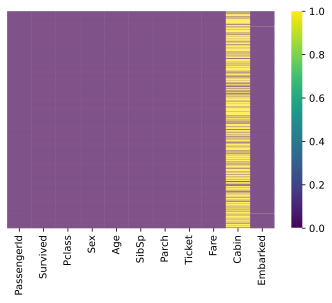

In [96]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(datatitanic.isna(),
            yticklabels = False,
            cbar = True,
            cmap = 'viridis')

Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: (age =< 12]  Kid; (12, 18]: Teen, (18, 60]: Adult và ( age > 60): Older

In [101]:
datatitanic.loc[(datatitanic['Age'] <= 12), 'Agegroup'] = 'Kid'
datatitanic.loc[(datatitanic['Age'] > 12) & (datatitanic['Age'] <= 18), 'Agegroup'] = 'Teen'
datatitanic.loc[(datatitanic['Age'] > 18) & (datatitanic['Age'] <= 60), 'Agegroup'] = 'Adult'
datatitanic.loc[(datatitanic['Age'] > 60), 'Agegroup'] = 'Older'

In [102]:
datatitanic.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Adult
5,6,0,3,M,25.0,0,0,330877,8.4583,NaN,Q,Adult
6,7,0,1,M,54.0,0,0,17463,51.8625,E46,S,Adult
7,8,0,3,M,2.0,3,1,349909,21.0750,NaN,S,Kid
8,9,1,3,F,27.0,0,2,347742,11.1333,NaN,S,Adult
9,10,1,2,F,14.0,1,0,237736,30.0708,NaN,C,Teen


Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi ―secondName